In [1]:
import sys
if '../' not in sys.path: sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2

from data import data_problems_examples
from neural_network import *
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
type_chosen = 'and'

X_train, Y_train = data_problems_examples.generate_problem(n_size=50, type=type_chosen)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test, Y_test = data_problems_examples.generate_problem(n_size=50, type=type_chosen)

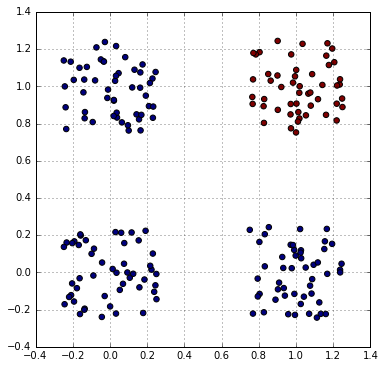

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=30)
plt.grid()

In [5]:
nn = NeuralNetwork(layers=[
    SigmoidLayer(1, bias=False)
], input_bias=True, loss_function='MSE', regular_type='l2', alpha=0)

In [6]:
nn.fit(X_train, Y_train, n_epoch=200, batch_size=30, learning_params=(.5, 1, 10))

epoch = 199 error = 0.0144557580742 learning_rate = 0.5


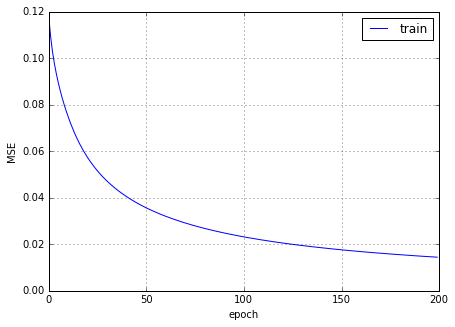

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(nn.error_train, label='train')
if nn.error_test:
    plt.plot(nn.error_test, label='CV')
plt.xlabel('epoch')
plt.ylabel(nn.loss_function)
plt.legend()
plt.grid()

In [8]:
Y_predicted = nn.predict(X_test, batch_size=None)
Y_predicted = Y_predicted.reshape(Y_predicted.shape[0])

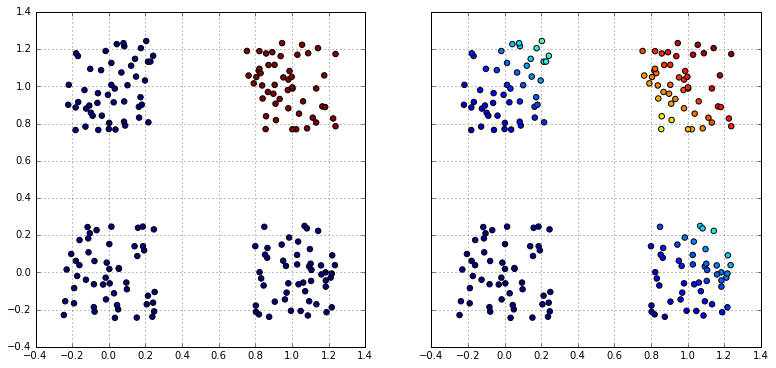

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 6))
ax1.scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted > 0.5, s=30)
ax1.grid()
ax2.scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted, s=30)
ax2.grid()